Importing Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/EV_Data.csv')


df.drop(columns=['Unnamed: 0'], inplace=True)
print(df.isnull().sum())





Age                                                                       0
City                                                                      0
Profession                                                              460
Marital Status                                                            0
Education                                                                 0
No. of Family members                                                     0
Annual Income                                                             0
Would you prefer replacing all your vehicles to Electronic vehicles?      0
If Yes/Maybe what type of  EV would you prefer?                           0
Do you think Electronic Vehicles are economical?                          0
Which brand of vehicle do you currently own?                              0
How much money could you spend on an Electronic vehicle?                  0
Preference for wheels in EV                                               0
Do you think

In [ ]:
df['Annual Income'] = df['Annual Income'].astype(int)
df.head()

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,30,Nabha,NaN,Single,Graduate,5,1193875,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,27,Pune,NaN,Single,Graduate,4,1844540,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,32,Kashipur,NaN,Single,Graduate,4,2948150,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,55,Pune,Business,Single,Graduate,3,2832379,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,26,Satara,NaN,Single,Graduate,4,2638750,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"


In [ ]:
df.describe()

,Age,No. of Family members,Annual Income,Preference for wheels in EV
count,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,31.800000,4.118000,2.258341e+06,3.349000
std,11.294847,1.469774,9.993558e+05,0.887686
min,15.000000,0.000000,-3.761500e+05,2.000000
25%,26.000000,4.000000,1.782115e+06,2.000000
50%,29.000000,4.000000,2.329246e+06,4.000000
75%,31.000000,5.000000,2.753169e+06,4.000000
max,118.000000,8.000000,1.282128e+07,4.000000


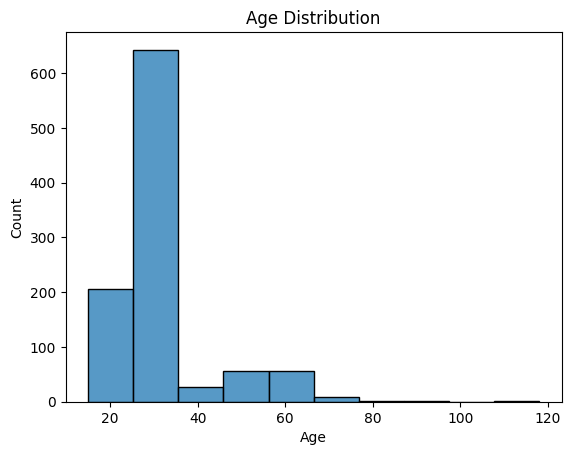

In [ ]:
# Age distribution
sns.histplot(df['Age'], bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



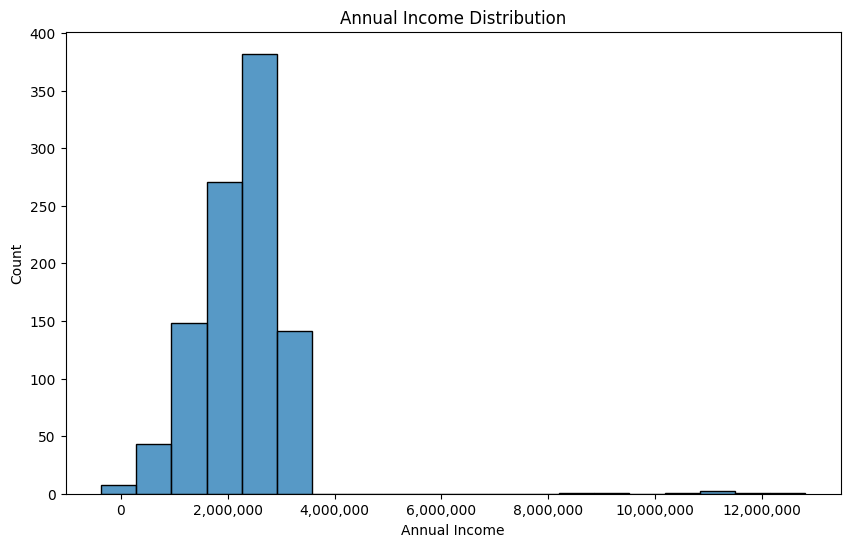

In [ ]:
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker


plt.figure(figsize=(10,6))
sns.histplot(df['Annual Income'], bins=20)


ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()


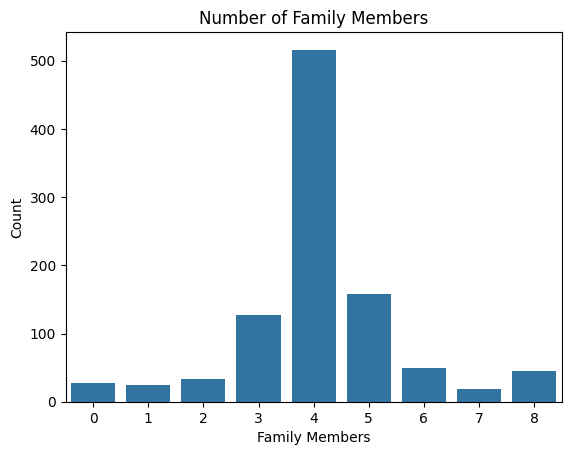

In [ ]:
# Family members distribution
sns.countplot(x='No. of Family members', data=df)
plt.title('Number of Family Members')
plt.xlabel('Family Members')
plt.ylabel('Count')
plt.show()



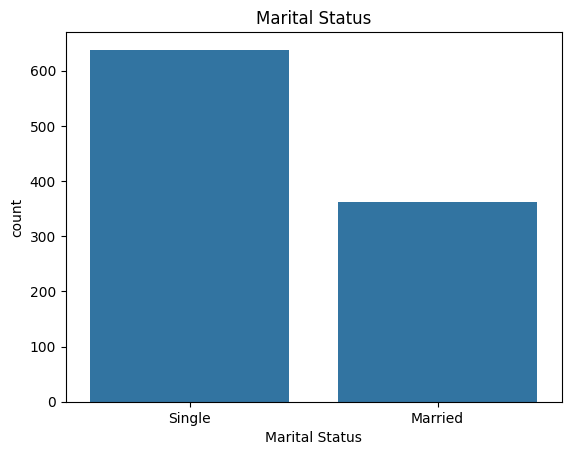

In [ ]:
# Marital Status count
sns.countplot(x='Marital Status', data=df)
plt.title('Marital Status')
plt.show()



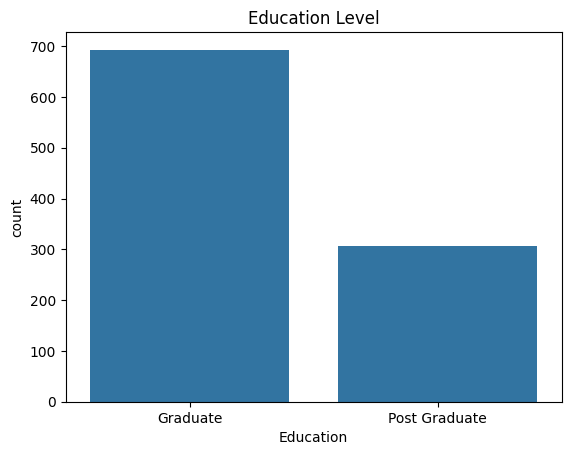

In [ ]:
# Education level count
sns.countplot(x='Education', data=df)
plt.title('Education Level')
plt.show()



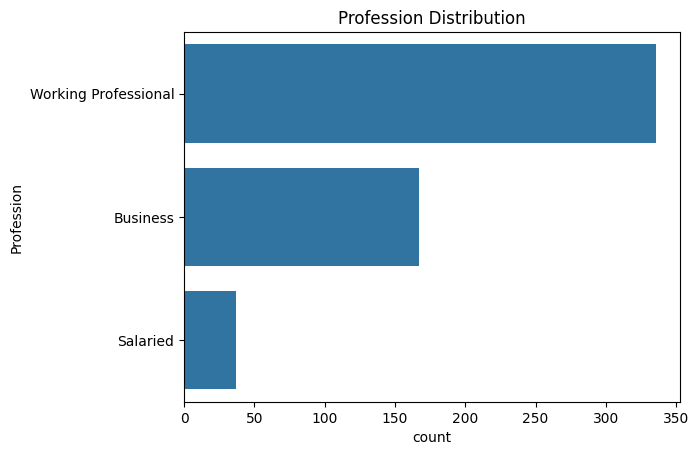

In [ ]:
# Profession count
sns.countplot(y='Profession', data=df, order=df['Profession'].value_counts().index)
plt.title('Profession Distribution')
plt.show()

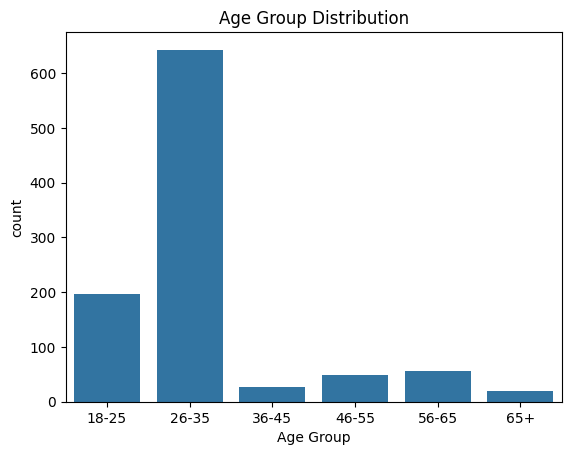

In [ ]:

bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)


sns.countplot(x='Age Group', data=df)
plt.title('Age Group Distribution')
plt.show()


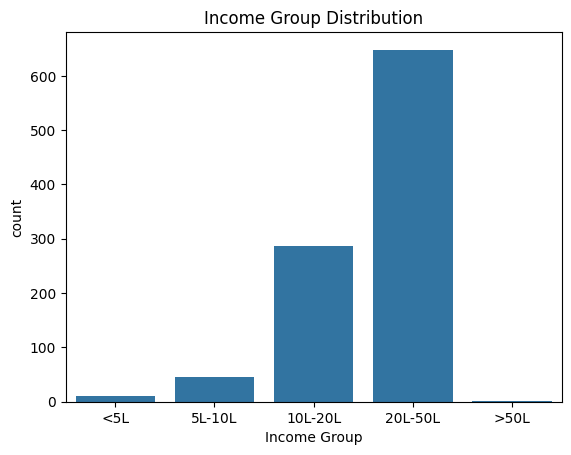

In [ ]:
# Create Income Groups
bins_income = [0, 500000, 1000000, 2000000, 5000000, 10000000]
labels_income = ['<5L', '5L-10L', '10L-20L', '20L-50L', '>50L']
df['Income Group'] = pd.cut(df['Annual Income'], bins=bins_income, labels=labels_income)


sns.countplot(x='Income Group', data=df)
plt.title('Income Group Distribution')
plt.show()


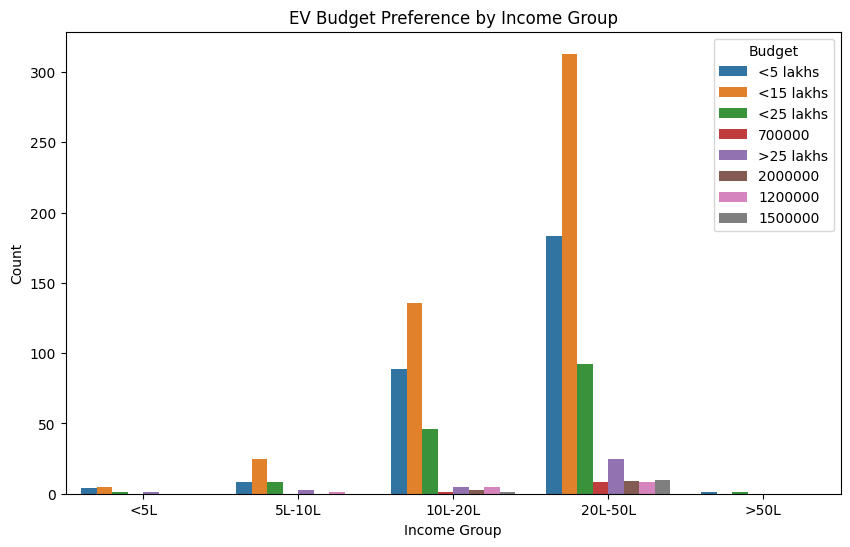

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Income Group', hue='How much money could you spend on an Electronic vehicle?', data=df)
plt.title('EV Budget Preference by Income Group')
plt.ylabel('Count')
plt.legend(title='Budget')
plt.show()


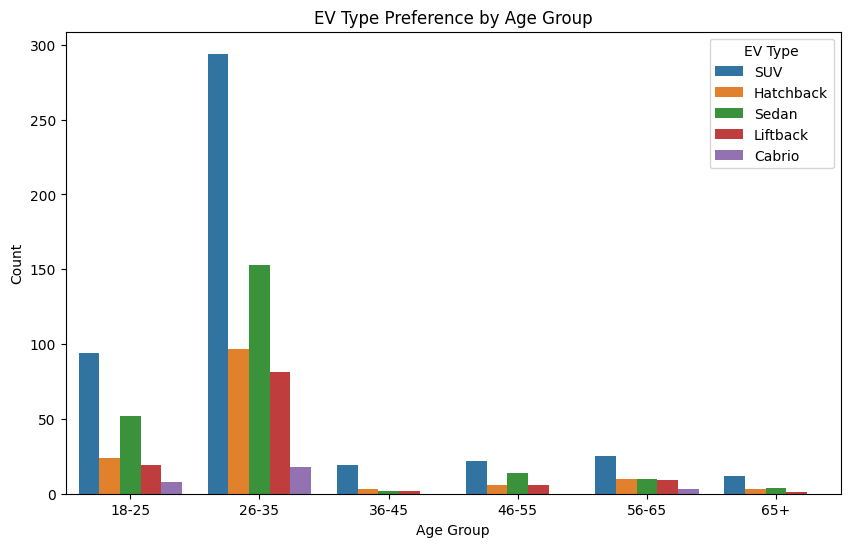

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', hue='If Yes/Maybe what type of  EV would you prefer?', data=df)
plt.title('EV Type Preference by Age Group')
plt.ylabel('Count')
plt.legend(title='EV Type')
plt.show()


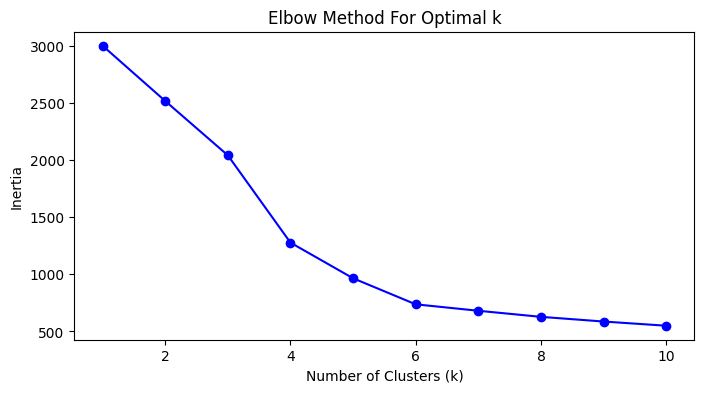

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

X = df[['Age', 'Annual Income', 'No. of Family members',]]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


print(df['Cluster'].value_counts())


Cluster
0    672
1    189
3    132
2      7
Name: count, dtype: int64


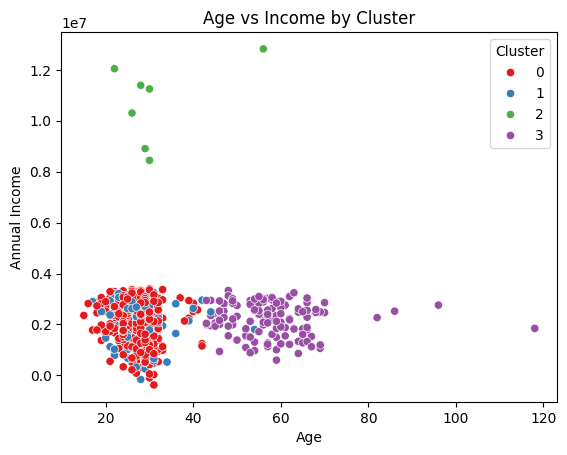

In [ ]:
sns.scatterplot(x='Age', y='Annual Income', hue='Cluster', data=df, palette='Set1')
plt.title('Age vs Income by Cluster')
plt.show()


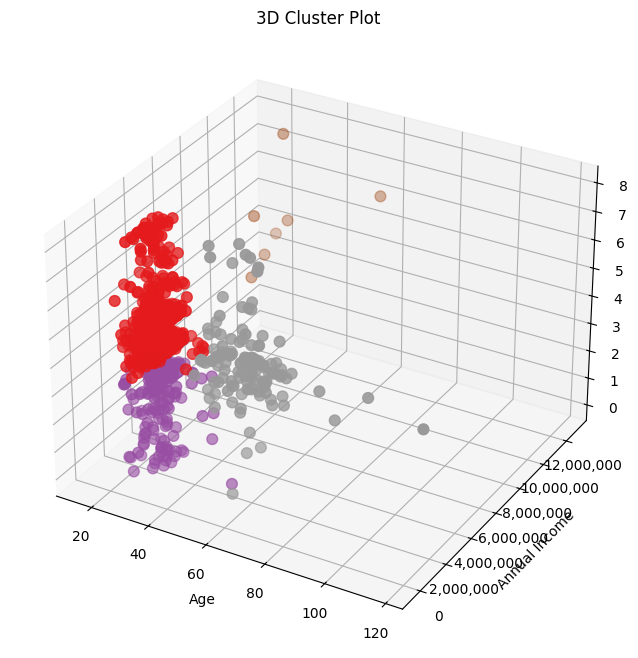

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mticker

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(df['Age'], df['Annual Income'], df['No. of Family members'],
                     c=df['Cluster'], cmap='Set1', s=60)


ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Family Members')
ax.set_title('3D Cluster Plot')


ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))


plt.show()


Most Customers Belong to Cluster 0 and Cluster 1


In [ ]:
Cluster_0 = df[df.Cluster==0]
Cluster_1 = df[df.Cluster==1]
Cluster_2 = df[df.Cluster==2]
Cluster_3 = df[df.Cluster==3]

In [ ]:
[Cluster_0['Age'].value_counts().head(3),
 Cluster_1['Age'].value_counts().head(3),
 Cluster_2['Age'].value_counts().head(3),
 Cluster_3['Age'].value_counts().head(3)]

[Age
 29    89
 30    88
 28    84
 Name: count, dtype: int64,
 Age
 29    26
 27    20
 26    20
 Name: count, dtype: int64,
 Age
 30    2
 26    1
 29    1
 Name: count, dtype: int64,
 Age
 59    9
 55    8
 46    8
 Name: count, dtype: int64]

Based on Cluster 0 and Cluster 1 Age group of 26-30 are to be targeted


In [ ]:
[Cluster_0['City'].value_counts().head(),
 Cluster_1['City'].value_counts().head(),
 Cluster_2['City'].value_counts().head(),
 Cluster_3['City'].value_counts().head()]

[City
 Pune         386
 Mumbai        31
 Pune          25
 New Delhi     17
 Nellore       13
 Name: count, dtype: int64,
 City
 Pune      116
 Delhi       9
 Mumbai      7
 Satara      5
 Nagpur      4
 Name: count, dtype: int64,
 City
 Pune         4
 Mumbai       1
 Ahmedabad    1
 Mumbai       1
 Name: count, dtype: int64,
 City
 Pune      64
 Pune      10
 Mumbai     6
 Satara     6
 Nagpur     5
 Name: count, dtype: int64]

# 1. **'Pune' & 'Mumbai'** are the most suitable location to create the early market in EV segment.
#2. **'New Delhi'** should be next priority.
